In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

### Read the input file and check the data dimension

In [2]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [3]:
# load the data set
df_credit = pd.read_csv("german_credit.csv")
print("Shape: ",df_credit.shape)
df_credit.head()

Shape:  (1000, 21)


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [4]:
X = df_credit.drop(columns=["default"],axis=1)
y = df_credit[['default']]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.50,random_state=1)

In [6]:
print("Training Set Size: ",X_train.shape)
print("Testing Set Size: ",X_test.shape)

Training Set Size:  (500, 20)
Testing Set Size:  (500, 20)


In [7]:
# Lets build a Ensemble model but need to modify the dataset first

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [8]:
# Print Shape of model data

In [9]:
print("Shape: ",df_credit.shape)

Shape:  (1000, 21)


In [10]:
# check datatype and details
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [11]:
# Convert non-numeric/categorical variable into dummy/indicator variables. 
# many columns will be created as distinct values using one hot coding
non_numeric_cols = ["account_check_status","credit_history","purpose","savings","present_emp_since","personal_status_sex","other_debtors","property","other_installment_plans","housing","job","people_under_maintenance","telephone","foreign_worker"]

df_credit = pd.get_dummies(df_credit, columns=non_numeric_cols)

In [12]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 63 columns):
default                                                                       1000 non-null int64
duration_in_month                                                             1000 non-null int64
credit_amount                                                                 1000 non-null int64
installment_as_income_perc                                                    1000 non-null int64
present_res_since                                                             1000 non-null int64
age                                                                           1000 non-null int64
credits_this_bank                                                             1000 non-null int64
account_check_status_0 <= ... < 200 DM                                        1000 non-null uint8
account_check_status_< 0 DM                                                   1000 non-null uint8
account_chec

### Check for highly correlated variables but don't required any treatment for this use case

In [13]:
# get correlation between all features
threshold = 0.5  # threshold for highly correlated variable
corr_matrix = df_credit.corr().abs()
high_corr_var = np.where(corr_matrix > threshold)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y],corr_matrix.iloc[x,y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
for val in high_corr_var:
    print("\n", val)


 ('duration_in_month', 'credit_amount', 0.6249841983009832)

 ('credits_this_bank', 'credit_history_critical account/ other credits existing (not at this bank)', 0.5013637491364831)

 ('credits_this_bank', 'credit_history_existing credits paid back duly till now', 0.540354484111696)

 ('credit_history_critical account/ other credits existing (not at this bank)', 'credit_history_existing credits paid back duly till now', 0.683617401411215)

 ('savings_... < 100 DM', 'savings_unknown/ no savings account', 0.5832811201871934)

 ('personal_status_sex_female : divorced/separated/married', 'personal_status_sex_male : single', 0.7380356889809168)

 ('other_debtors_co-applicant', 'other_debtors_none', 0.6457208265764921)

 ('other_debtors_guarantor', 'other_debtors_none', 0.7314079429820176)

 ('property_unknown / no property', 'housing_for free', 0.779852640966377)

 ('other_installment_plans_bank', 'other_installment_plans_none', 0.8405461334782369)

 ('housing_for free', 'housing_own', 0.5

In [14]:
# alternatively we caan use pair plot but as num of feature is very high it is time consuming fucntions
#sns.pairplot(df_credit, diag_kind="kde")

### Drop the original variables which are converted to dummy

In [15]:
# df_credit does not contains original variables which are converted to dummy

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [16]:
X = df_credit.drop(columns=["default"],axis=1)
y = df_credit[['default']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)

print("Training X Set Size: ",X_train.shape)
print("Testing X Set Size: ",X_test.shape)
print("Training y Set Size: ",y_train.shape)
print("Testing y Set Size: ",y_test.shape)

Training X Set Size:  (700, 62)
Testing X Set Size:  (300, 62)
Training y Set Size:  (700, 1)
Testing y Set Size:  (300, 1)


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [18]:
from sklearn import metrics

# performance on test data. # calculate accuracy score on test data(this is unseen data not used while modeling)
y_predict = rf_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test,y_predict)
print("\nRandomForestClassifier: Accuracy Score on test data: ", accuracy)


RandomForestClassifier: Accuracy Score on test data:  0.7666666666666667


In [19]:
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85       214
           1       0.69      0.34      0.45        86

   micro avg       0.77      0.77      0.77       300
   macro avg       0.73      0.64      0.65       300
weighted avg       0.75      0.77      0.74       300

[[201  13]
 [ 57  29]]


### Q6 Show the list of the features importance( 1 Marks)

In [20]:
# for above trained model get the feature importance
feature_imp = pd.DataFrame(rf_model.feature_importances_, columns = ["Imp"], index = X.columns)
print(feature_imp)

                                                         Imp
duration_in_month                                   0.076447
credit_amount                                       0.099817
installment_as_income_perc                          0.037669
present_res_since                                   0.032375
age                                                 0.075488
credits_this_bank                                   0.018878
account_check_status_0 <= ... < 200 DM              0.016364
account_check_status_< 0 DM                         0.030684
account_check_status_>= 200 DM / salary assignm...  0.007861
account_check_status_no checking account            0.044939
credit_history_all credits at this bank paid ba...  0.007329
credit_history_critical account/ other credits ...  0.029773
credit_history_delay in paying off in the past      0.008880
credit_history_existing credits paid back duly ...  0.014737
credit_history_no credits taken/ all credits pa...  0.011853
purpose_(vacation - does

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [22]:
# Use below values
num_folds = 10
seed = 77

In [23]:
#Validate the Random Forest model build above using k fold

In [24]:
kfold = KFold(n_splits=num_folds, random_state=seed)
scores = []
scores = cross_val_score(rf_model, X_train, y_train, cv=kfold, scoring='accuracy')

In [25]:
#Calculate Mean score

In [26]:
score_mean = scores.mean()
print("KFold Cross Validation: Mean Accuracy: %0.04f [Random Forest]" %(score_mean*100))

KFold Cross Validation: Mean Accuracy: 76.2857 [Random Forest]


In [27]:
# Calculate score standard deviation using std()

In [28]:
score_std = scores.std()
print("KFold Cross Validation: Standard Deviation Accuracy: +/- %0.4f [Random Forest]" %(score_std*100))

KFold Cross Validation: Standard Deviation Accuracy: +/- 4.8739 [Random Forest]


# Q8 Print the confusion matrix( 1 Marks)

In [29]:
y_predict = rf_model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[201  13]
 [ 57  29]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [30]:
# Analysis distibution of target variable
colname = "default"
col_data = df_credit[colname].value_counts().to_frame()
col_data.reset_index(inplace=True)
col_data.columns = [col_data.columns[1], 'count']
col_data['prop'] = col_data['count'] / sum(col_data['count'])
print("\n % Distribution for: ",colname)
print(col_data)


 % Distribution for:  default
   default  count  prop
0        0    700   0.7
1        1    300   0.3


In [31]:
# cross tab analysis helps to get precision and recall values for each class..

# precision tells, how many of the selected objects were correct
# recall tells, how well model is able to classify the object

# Performing cross tab analysis between tue and predicted values.
# first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
y_test1 = y_test.default   # readjusting the dimensions
res = pd.crosstab(y_test1, y_predict)

# visualizing the crosstab
print_res = res.copy()
print_res.columns = ['pred:no', 'pred:yes']
print_res.index = ['true:no', 'true:yes']
print("Crosstab Matrix:\n\n ", print_res)

# data for precision and recall calculation for Class0 (Default=0, Good Credit)
class0_tp = res[0][0] # [True Positive] correctly idenfying class0
class0_fn = res[1][0] # [False Negative] not able to identify it as class0
class0_fp = res[0][1] # [Flase Positive] fasely identifying as class0

# data for precision and recall calculation for Class1 (default=1, Bad Credit)
class1_tp = res[1][1] # [True Positive] correctly idenfying class1
class1_fn = res[0][1] # [False Negative] not able to identify it as class1
class1_fp = res[1][0] # [Flase Positive] fasely identifying as class1

# calculating presision and recall for class0
class0_precision = class0_tp / (class0_tp + class0_fp)
class0_recall = class0_tp / (class0_tp + class0_fn)

# calculating presision and recall for class1
class1_precision = class1_tp / (class1_tp + class1_fp)
class1_recall = class1_tp / (class1_tp + class1_fn)

print("\nclass0 [Good Credit]: pecision: %0.2f, recall:  %0.2f" %(class0_precision,class0_recall))
print("class1 [Bad Credit]: precision: %0.2f, recall:  %0.2f" %(class1_precision,class1_recall))

Crosstab Matrix:

            pred:no  pred:yes
true:no       201        13
true:yes       57        29

class0 [Good Credit]: pecision: 0.78, recall:  0.94
class1 [Bad Credit]: precision: 0.69, recall:  0.34


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [32]:
#Hint: Use roc_curve

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

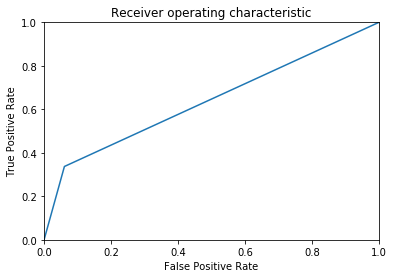

In [33]:
fpr,tpr, thresholds = metrics.roc_curve(y_test, y_predict)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [34]:
roc_auc = metrics.auc(fpr, tpr)
print('Area Under the curve',roc_auc)

Area Under the curve 0.6382308193870898


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [35]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [36]:
n = df_credit.shape[0]  # number of samples in dataset
for i in range(bootstrap_iteration):
    # bootstrap sample with replacement.. 
    df = df_credit.iloc[np.random.choice(n, size=n, replace=True)]
    
    # split trabing and test data
    X = df.drop(columns=["default"],axis=1)
    y = df[['default']]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)

    # modeling on this set of bootstraped dataset
    rf_model = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
    rf_model.fit(X_train, y_train)

    # calculate accuracy score on test data(this is unseen data not used while modeling)
    y_predict = rf_model.predict(X_test)
    acc = metrics.accuracy_score(y_test,y_predict)
    accuracy.append(acc)

# averaging accuracy of models 
avg_accuracy = np.mean(accuracy)
print("Bootstrapping: average accuracy: %0.04f" %(avg_accuracy*100))

Bootstrapping: average accuracy: 86.4333
